In [41]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [42]:
len(train_data)

8982

In [43]:
len(test_data)

2246

In [44]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [45]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [46]:
train_labels[10]

3

In [47]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [48]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
     results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [49]:
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [50]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [51]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [52]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [53]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 43ms/step - loss: 2.5718 - accuracy: 0.5030 - val_loss: 1.7813 - val_accuracy: 0.6250
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 1.5265 - accuracy: 0.6736 - val_loss: 1.4106 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 0s 30ms/step - loss: 1.1969 - accuracy: 0.7301 - val_loss: 1.2196 - val_accuracy: 0.7210
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 0.9929 - accuracy: 0.7786 - val_loss: 1.0960 - val_accuracy: 0.7540
Epoch 5/20
16/16 [==============================] - 0s 29ms/step - loss: 0.8326 - accuracy: 0.8138 - val_loss: 1.0181 - val_accuracy: 0.7710
Epoch 6/20
16/16 [==============================] - 0s 29ms/step - loss: 0.6987 - accuracy: 0.8424 - val_loss: 0.9800 - val_accuracy: 0.7870
Epoch 7/20
16/16 [==============================] - 0s 30ms/step - loss: 0.5910 - accuracy: 0.8702 - val_loss: 0.9150 - val_accuracy: 0.8060
Epoch 8/20
16

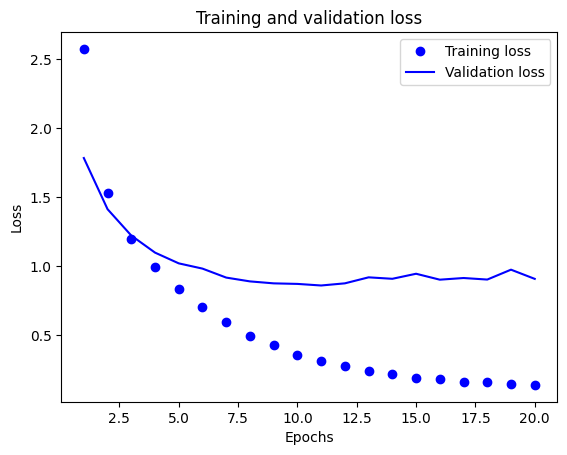

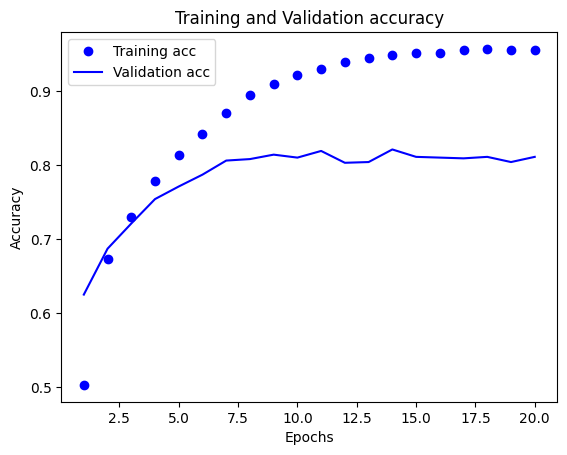

In [54]:
import matplotlib.pyplot as plt
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [55]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',

loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 40ms/step - loss: 2.7225 - accuracy: 0.5117 - val_loss: 1.8354 - val_accuracy: 0.6310
Epoch 2/9
16/16 [==============================] - 0s 30ms/step - loss: 1.5332 - accuracy: 0.6849 - val_loss: 1.3602 - val_accuracy: 0.7040
Epoch 3/9
16/16 [==============================] - 0s 28ms/step - loss: 1.1732 - accuracy: 0.7438 - val_loss: 1.1984 - val_accuracy: 0.7250
Epoch 4/9
16/16 [==============================] - 0s 27ms/step - loss: 0.9555 - accuracy: 0.7932 - val_loss: 1.0719 - val_accuracy: 0.7660
Epoch 5/9
16/16 [==============================] - 0s 27ms/step - loss: 0.7973 - accuracy: 0.8289 - val_loss: 1.0096 - val_accuracy: 0.7830
Epoch 6/9
16/16 [==============================] - 0s 28ms/step - loss: 0.6659 - accuracy: 0.8587 - val_loss: 0.9519 - val_accuracy: 0.7950
Epoch 7/9
16/16 [==============================] - 0s 29ms/step - loss: 0.5547 - accuracy: 0.8825 - val_loss: 0.9207 - val_accuracy: 0.7970
Epoch 8/9
16/16 [===

In [56]:
results

[0.9359526634216309, 0.7871772050857544]